# Lab-12 K-Cross Validation and Stacking

## Tanishq Gupta - 19BCE1392

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Preparing Data
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Dropping columns that are not required

In [5]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [6]:
#checking null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
#data imputation
df.drop(['Cabin'], axis=1, inplace=True)
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df.shape

(889, 8)

In [10]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [11]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#encoding categorical variables
df = df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [14]:
X = df.iloc[:,1:]
y= df.iloc[:,0]

In [15]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Predicting without cross-validation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
my_model = LogisticRegression()
my_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = my_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ' + str(accuracy))

Accuracy : 0.7191011235955056


Prediction using cross-validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [21]:
cross_val = KFold(n_splits=10, shuffle=False)
my_model = LogisticRegression(max_iter=200)
scores = cross_val_score(my_model, X, y, scoring='accuracy', cv=cross_val)

In [22]:
scores

array([0.78651685, 0.80898876, 0.7752809 , 0.79775281, 0.79775281,
       0.76404494, 0.76404494, 0.7752809 , 0.84269663, 0.81818182])

In [23]:
print('Accuracy : %f (%f)' % (np.mean(scores), np.std(scores)))

Accuracy : 0.793054 (0.023982)


ENSEMBLE STACKING

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [26]:
# Calculating individual accuracy scores
models = {}
models['Logistic Regression'] = LogisticRegression(max_iter=200)
models['KNN'] = KNeighborsClassifier()
models['Decision Tree'] = DecisionTreeClassifier()
models['Naive Bayes'] = GaussianNB()
models['SVM'] = SVC()

In [27]:
# For K = 3
acc_scores = []
model_names = []
for name, model in models.items():
    cv = KFold(n_splits=3, shuffle=False)
    scores = cross_val_score(model, X.values, y, scoring='accuracy', cv=cv)
    acc_scores.append(scores)
    model_names.append(name)
    print('%s : %f (%f)' % (name, np.mean(scores), np.std(scores)))

Logistic Regression : 0.794169 (0.012307)
KNN : 0.697440 (0.016998)
Decision Tree : 0.759290 (0.006580)
Naive Bayes : 0.785187 (0.021905)
SVM : 0.652444 (0.020355)


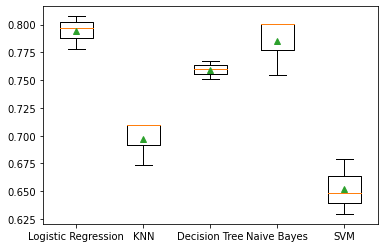

In [28]:
plt.boxplot(acc_scores, labels=model_names, showmeans=True)
plt.show()

In [29]:
# For K = 5
acc_scores = []
model_names = []
for name, model in models.items():
    cv = KFold(n_splits=5, shuffle=False)
    scores = cross_val_score(model, X.values, y, scoring='accuracy', cv=cv)
    acc_scores.append(scores)
    model_names.append(name)
    print('%s : %f (%f)' % (name, np.mean(scores), np.std(scores)))

Logistic Regression : 0.791963 (0.031276)
KNN : 0.686225 (0.035153)
Decision Tree : 0.782918 (0.023592)
Naive Bayes : 0.787431 (0.018297)
SVM : 0.663715 (0.036606)


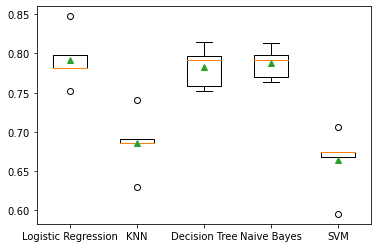

In [30]:
plt.boxplot(acc_scores, labels=model_names, showmeans=True)
plt.show()

In [31]:
# For K = 10
acc_scores = []
model_names = []
for name, model in models.items():
    cv = KFold(n_splits=10, shuffle=False)
    scores = cross_val_score(model, X.values, y, scoring='accuracy', cv=cv)
    acc_scores.append(scores)
    model_names.append(name)
    print('%s : %f (%f)' % (name, np.mean(scores), np.std(scores)))

Logistic Regression : 0.793054 (0.023982)
KNN : 0.696425 (0.052705)
Decision Tree : 0.781793 (0.028836)
Naive Bayes : 0.784040 (0.022231)
SVM : 0.674936 (0.036550)


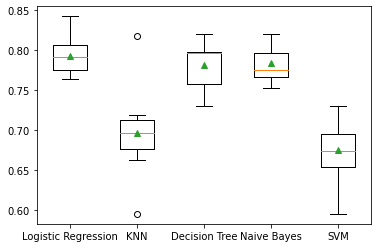

In [32]:
plt.boxplot(acc_scores, labels=model_names, showmeans=True)
plt.show()

STACKING

In [33]:
from sklearn.ensemble import StackingClassifier

In [34]:
# Level 0 Models
level0 = []
level0.append(('lr', LogisticRegression(max_iter=200)))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('bayes', GaussianNB()))
level0.append(('svm', SVC()))
# Level 1 Model : Meta Classifier
level1 = LogisticRegression()

In [35]:
my_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
cv = KFold(n_splits=10, shuffle=False)
scores = cross_val_score(my_model, X.values, y, scoring='accuracy', cv=cv)
print('Ensemble Stacking : %f (%f)' % (np.mean(scores), np.std(scores)))

Ensemble Stacking : 0.812168 (0.034731)
